<a href="https://colab.research.google.com/github/AkramJAmer/ChessFinalProject/blob/master/Forestry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            1888 non-null   object 
 1   umd_tree_cover_density_2000__threshold             1888 non-null   int64  
 2   umd_tree_cover_extent_2000__ha                     1888 non-null   int64  
 3   gfw_aboveground_carbon_stocks_2000__Mg_C           1888 non-null   int64  
 4   avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1  1888 non-null   int64  
 5   gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1    708 non-null    float64
 6   gfw_forest_carbon_gross_removals__Mg_CO2_yr-1      708 non-null    float64
 7   gfw_forest_carbon_net_flux__Mg_CO2e_yr-1           708 non-null    float64
 8   gfw_forest_carbon_gross_emissions_2001__Mg_CO2e    708 non-null    float64
 9   gfw_fore

<Axes: >

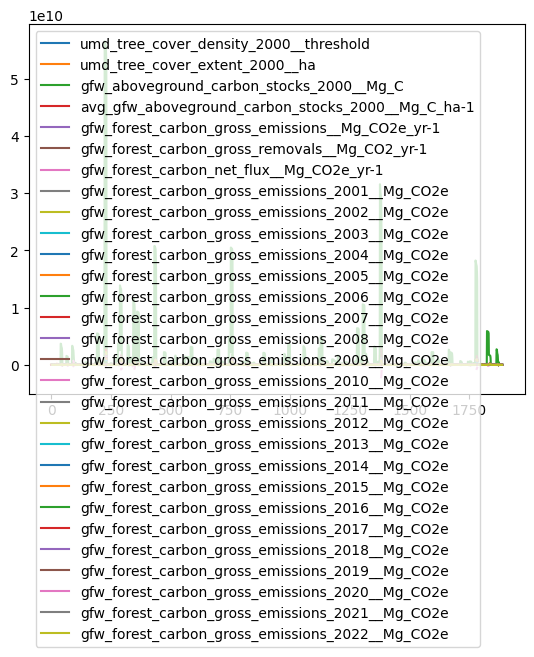

In [47]:
from google.colab import files
#uploaded = files.upload()

df_original = pd.read_csv('Country carbon data.csv')
#df_original = pd.read_csv('Country tree cover loss.csv')
#df_original = pd.read_csv('Subnational 1 carbon data.csv')
#df_original = pd.read_csv('Subnational 1 tree cover loss.csv')

df_original.head()
df_original.info()
df_original.describe()
df_original.plot()

KeyError: 'gfw_forest_carbon_gross_emissions__Mg_CO2e'

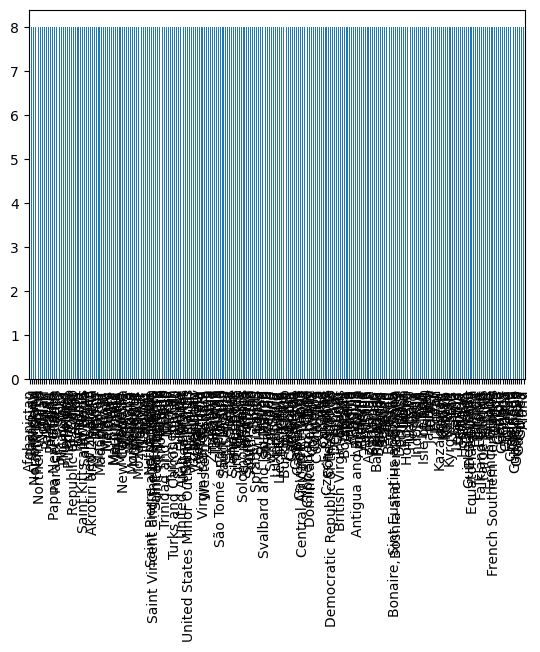

In [40]:
df_original['country'].value_counts().plot(kind='bar')
df_us = df_original[df_original['country'] == 'United States']
df_us['gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1'].plot(kind='box')
sns.barplot(df['year'],df['gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1'])

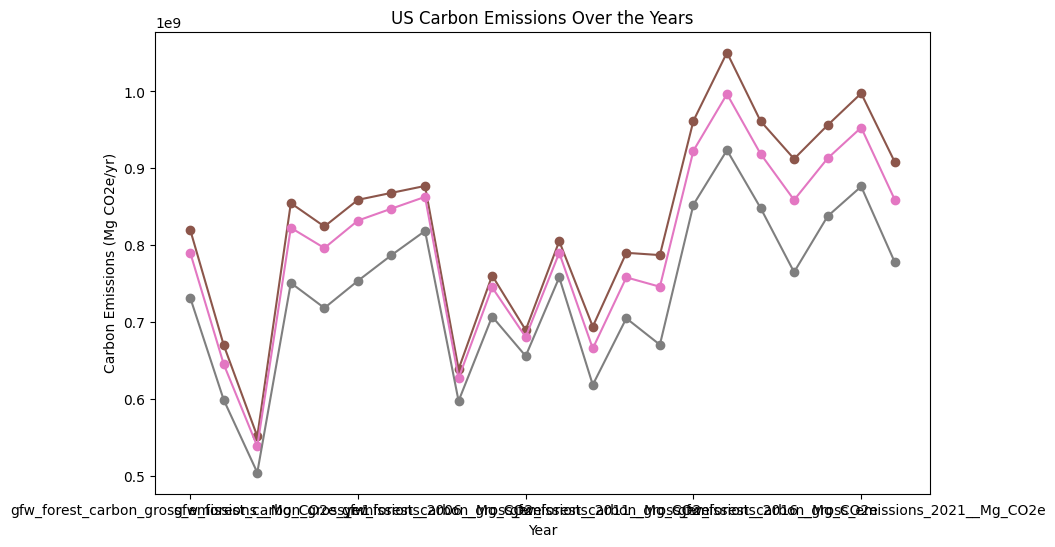

In [34]:
us_emissions_columns = [col for col in df_us.columns if 'gfw_forest_carbon_gross_emissions' in col]
df_us_emissions = df_us[us_emissions_columns].transpose()

df_us_emissions.plot(marker='o', linestyle='-', figsize=(10, 6), legend=False)
plt.title('US Carbon Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (Mg CO2e/yr)')
plt.show()

The USA is still one of the largest outputters of carbon emissions so its important to see their change over the years. As most countries have pushed for reduced emissions, the US has seemed to increase their emissions in general.

In [ ]:
# create a box plot, categorial data
sns.boxplot(df['age'], df['chol'], hue=df['sex'])
# More info: https://seaborn.pydata.org/generated/seaborn.boxplot.html

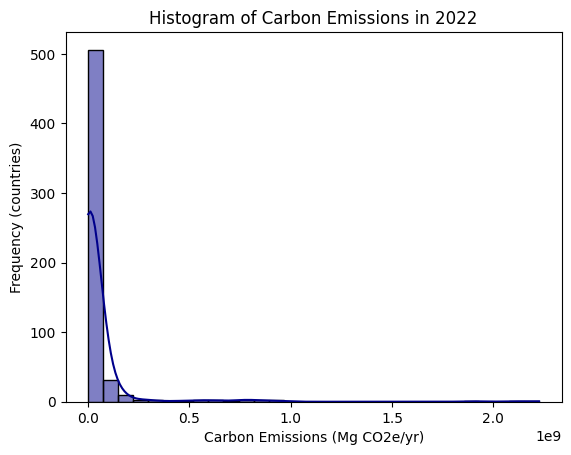

In [51]:
non_zero_emissions = df_original[df_original['gfw_forest_carbon_gross_emissions_2022__Mg_CO2e'] > 0]

# Create a histogram for non-zero emissions
sns.histplot(non_zero_emissions['gfw_forest_carbon_gross_emissions_2022__Mg_CO2e'], bins=30, kde=True, color='darkblue', edgecolor='black')
plt.title('Histogram of Carbon Emissions in 2022')
plt.xlabel('Carbon Emissions (Mg CO2e/yr)')
plt.ylabel('Frequency (countries)')
plt.show()

An important histogram because it shows that many countries have reduced their carbon emissions by 2022.

In [ ]:
# create a heatmap of the correlation matrix of a DataFrame
plt.subplots(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

In [ ]:
sns.pairplot(df, hue='output')
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

<ipython-input-55-1a49662f1be4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_original.corr()


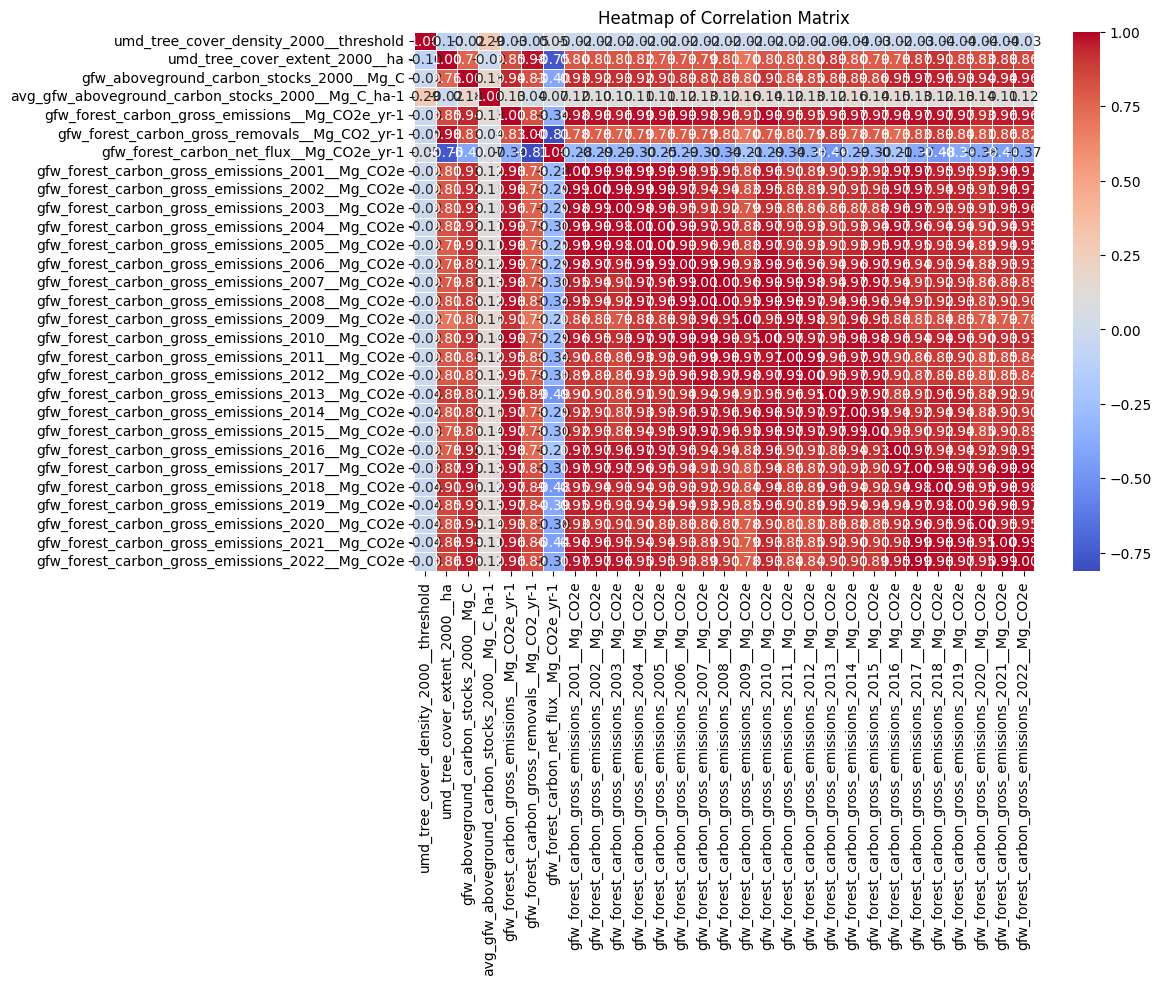

In [55]:
# computes the Pearson correlation coefficient
correlation_matrix = df_original.corr()

# creates a Matplotlib figure and axes for plotting with a specified figure size
# create a heatmap visualization
plt.subplots(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

<ipython-input-62-116131feeeb5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='gfw_forest_carbon_gross_emissions_2022__Mg_CO2e', data=top_100_emissions, palette='viridis')


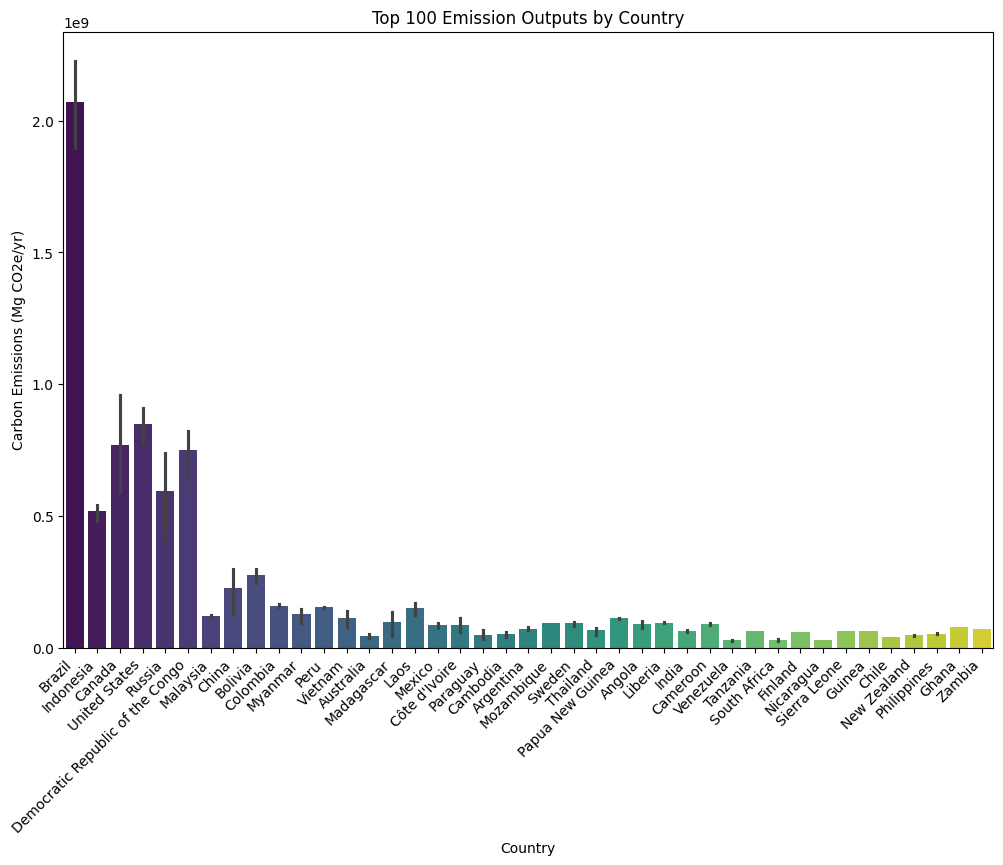

In [62]:
sorted_df = df_original.sort_values(by='gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1', ascending=False)

# Select the top 100 rows
top_100_emissions = sorted_df.head(100)

# Create a bar plot for the top 100 emissions
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='gfw_forest_carbon_gross_emissions_2022__Mg_CO2e', data=top_100_emissions, palette='viridis')
plt.title('Top 100 Emission Outputs by Country in 2022')
plt.xlabel('Country')
plt.ylabel('Carbon Emissions (Mg CO2e/yr)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

This bar graph is interesting because it shows the top 100 carbon emission countries. This is helpful for my machine learning goal of predicting the future carbon emissions of countries. This could also expand into how the economic state of a country can affect their carbon emissions.